# Histogram Equalization

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image


## Implementing Histogram Equalization

In [254]:
def plot_hist(img: np.ndarray) -> None:
    """Plot the histogram of the image"""
    plt.hist(img, bins=256, range=(0, 255))
    plt.show()

def calculate_pdf(img: np.ndarray) -> np.ndarray:
    """Calculate the probability distribution of the image"""
    # create a histogram of the image
    hist = np.zeros(255)
    # iterate through the image and count the number of pixels for each intensity value
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]] += 1

    # normalize the histogram
    hist = (hist) / hist.sum()
    return hist

def calculate_cdf(pdf: np.ndarray) -> np.ndarray:
    """Calculate the cumulative distribution function"""
    cdf = np.zeros(255)
    # calculate the cumulative distribution function
    cdf[0] = pdf[0]
    for i in range(1, len(pdf)):
        cdf[i] = cdf[i - 1] + pdf[i]
    return cdf

def histogram_equalization(img: np.ndarray) -> np.ndarray:
    hist = np.zeros(255)
    img_cp = img.copy()
    # iterate through the image and count the number of pixels for each intensity value
    pdf = calculate_pdf(img)
    cdf = calculate_cdf(pdf)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_cp[i][j] = cdf[img[i][j]] * 255

    return img_cp

def plot_imgs(img1: np.ndarray, img2: np.ndarray) -> None:
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image')
    plt.axis(False)
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
    plt.title('Histogram Equalized Image')
    plt.axis(False)
    plt.show()




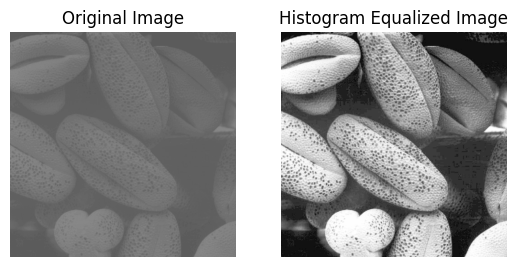

In [255]:
# Load the image as grayscale
img = np.array(Image.open('seeds.jpg'))
img_eq = histogram_equalization(img)
plot_imgs(img, img_eq)




#plot_hist(img_eq)